<a href="https://colab.research.google.com/github/SriRamK345/Student-Performance-Analysis/blob/main/Student_Performance_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
# ! pip install opendatasets

## Importing Libraries

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
# from sklearn.compose import ColumnTransformer

# from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# from scipy.stats import uniform, randint

## Data Loading and Basic Exploration

In [112]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data")

Skipping, found downloaded files in "./students-performance-in-exams" (use force=True to force download)


In [114]:
df= pd.read_csv("/content/students-performance-in-exams/StudentsPerformance.csv")

In [115]:
df.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
726,female,group E,associate's degree,standard,completed,65,75,77
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
518,female,group D,some high school,standard,completed,66,78,78
324,female,group C,high school,free/reduced,none,41,46,43


In [116]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [118]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [119]:
df.describe(include="object").T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [120]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [121]:
gender = df["gender"].value_counts()
parental_background = df["parental level of education"].value_counts()
preparation = df["test preparation course"].value_counts()
race = df["race/ethnicity"].value_counts()
lunch = df["lunch"].value_counts()

print("Value counts:",gender)
print("-" * 25)
print("Value counts:", parental_background)
print("-" * 25)
print("Value counts:", preparation)
print("-" * 25)
print("Value counts:",race)
print("-" * 25)
print("Value counts:",lunch)

Value counts: gender
female    518
male      482
Name: count, dtype: int64
-------------------------
Value counts: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
-------------------------
Value counts: test preparation course
none         642
completed    358
Name: count, dtype: int64
-------------------------
Value counts: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
-------------------------
Value counts: lunch
standard        645
free/reduced    355
Name: count, dtype: int64


## **Exploratory Data Analysis**

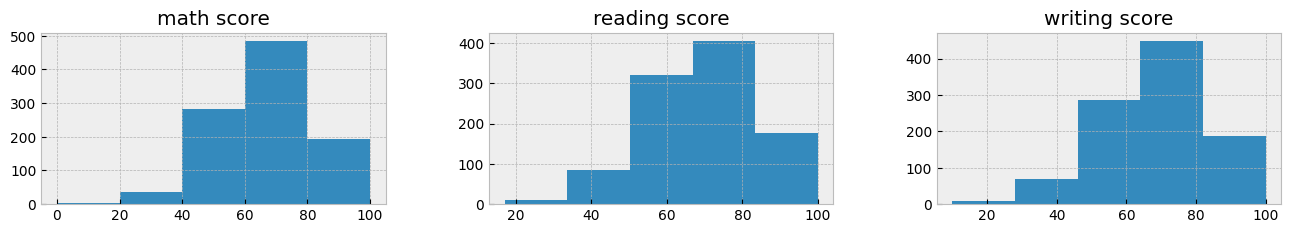

In [122]:
plt.style.use('bmh')
df.hist(bins=5, figsize=(16,8), layout=(3,3))
plt.show()

In [123]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['Total Score'] = df['reading score'] + df['writing score'] + df['math score']
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278


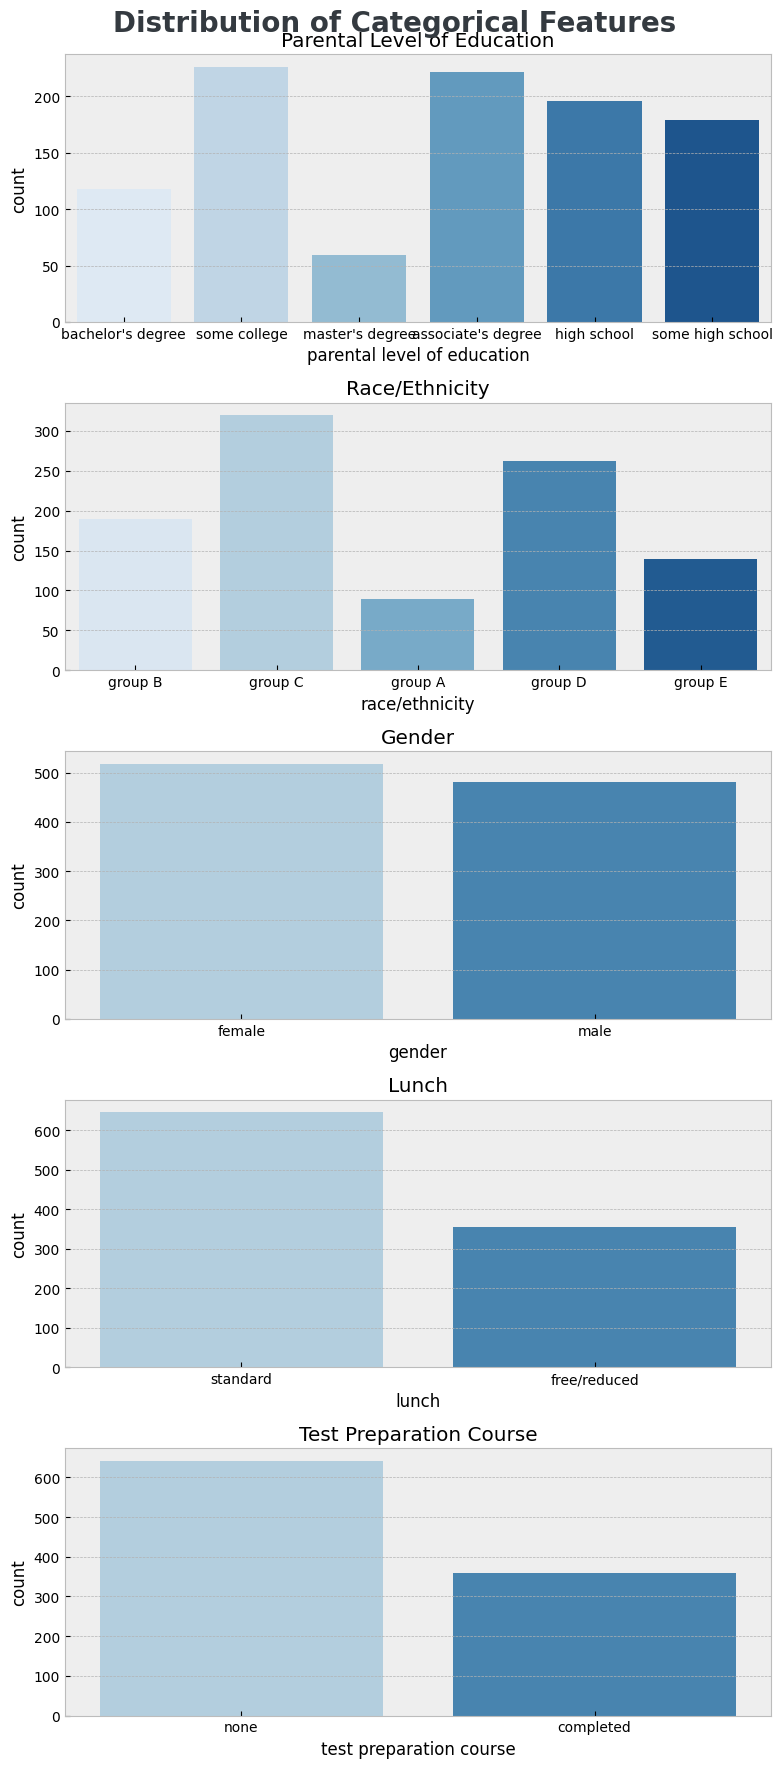

In [124]:
# Catrgorical Features Distribution
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8,18))
#axs=axs.flatten()

sns.countplot(data = df, x='parental level of education', palette='Blues', ax=axs[0])
axs[0].set_title("Parental Level of Education")

sns.countplot(data = df, x='race/ethnicity', palette='Blues', ax=axs[1])
axs[1].set_title("Race/Ethnicity")

sns.countplot(data = df, x='gender', palette='Blues', ax=axs[2])
axs[2].set_title("Gender")

sns.countplot(data = df, x='lunch', palette='Blues', ax=axs[3])
axs[3].set_title("Lunch")

sns.countplot(data = df, x='test preparation course', palette='Blues', ax=axs[4])
axs[4].set_title("Test Preparation Course")

plt.suptitle("Distribution of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

In [125]:
# List of categorical features to plot
categorical_features = ['parental level of education', 'race/ethnicity', 'gender', 'lunch', 'test preparation course']

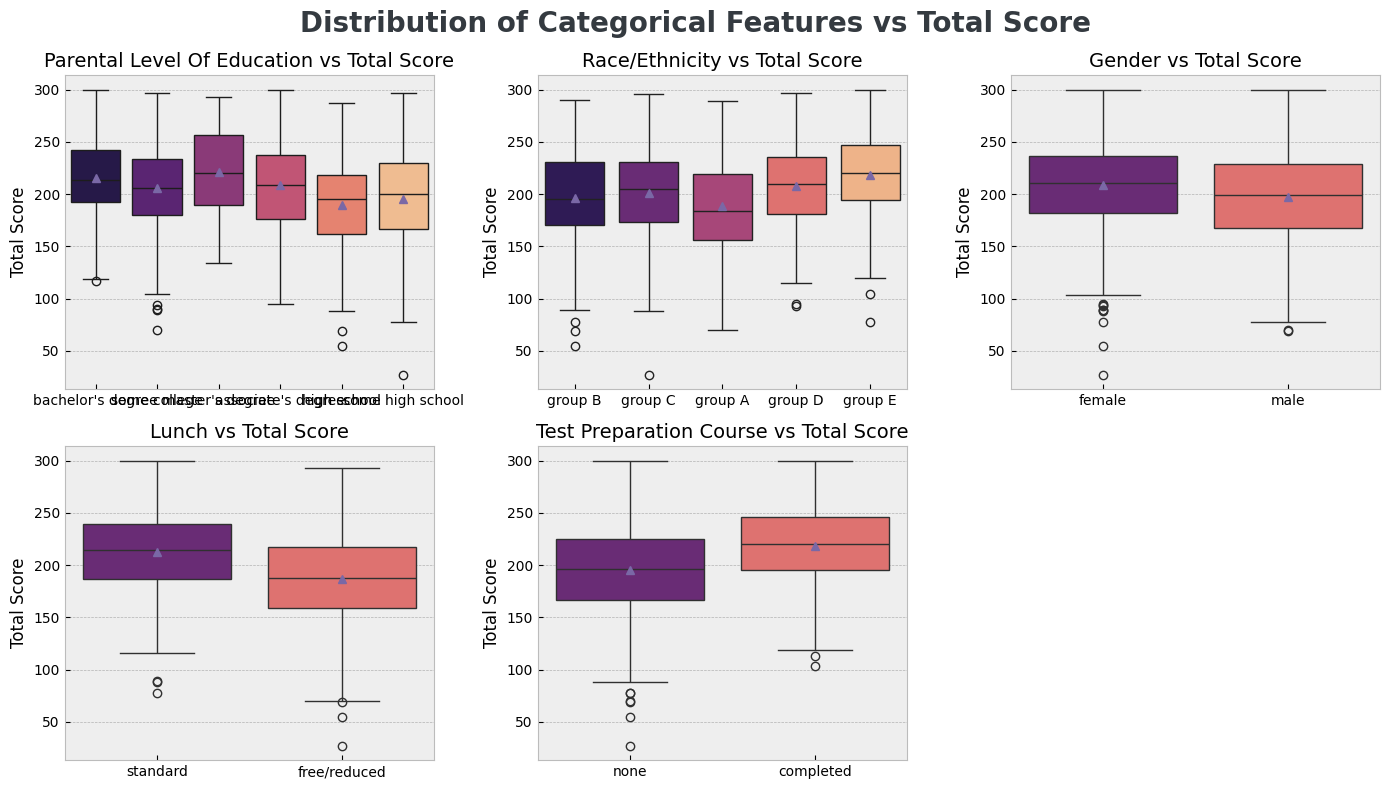

In [126]:
# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axs = axs.flatten()

# Iterate through categorical features and create boxplots
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='Total Score', showmeans=True,  data=df, palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Total Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Total Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()

plt.suptitle("Distribution of Categorical Features vs Total Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

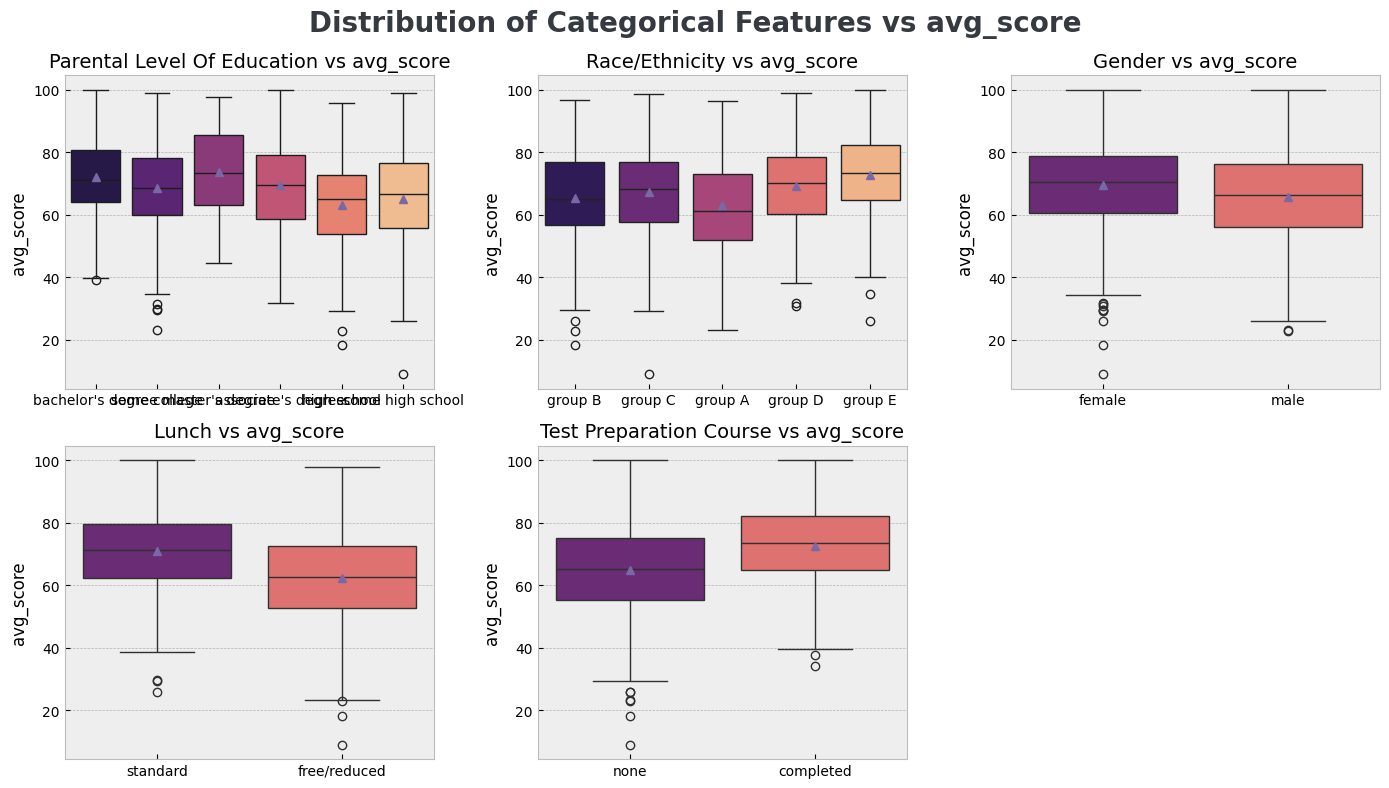

In [127]:
# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axs = axs.flatten()

# Iterate through categorical features and create boxplots
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='avg_score', showmeans=True,  data=df, palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs avg_score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('avg_score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()

plt.suptitle("Distribution of Categorical Features vs avg_score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

In [128]:
# LabelEncoding to cat column

le = LabelEncoder()

df_le = df.copy()
df_le['gender'] = le.fit_transform(df_le['gender'])
df_le['race/ethnicity'] = le.fit_transform(df_le['race/ethnicity'])
df_le['parental level of education'] = le.fit_transform(df_le['parental level of education'])
df_le['lunch'] = le.fit_transform(df_le['lunch'])
df_le['test preparation course'] = le.fit_transform(df_le['test preparation course'])
df_le.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,0,1,1,1,1,72,72,74,72.666667,218
1,0,2,4,1,0,69,90,88,82.333333,247
2,0,1,3,1,1,90,95,93,92.666667,278
3,1,0,0,0,1,47,57,44,49.333333,148
4,1,2,4,1,1,76,78,75,76.333333,229


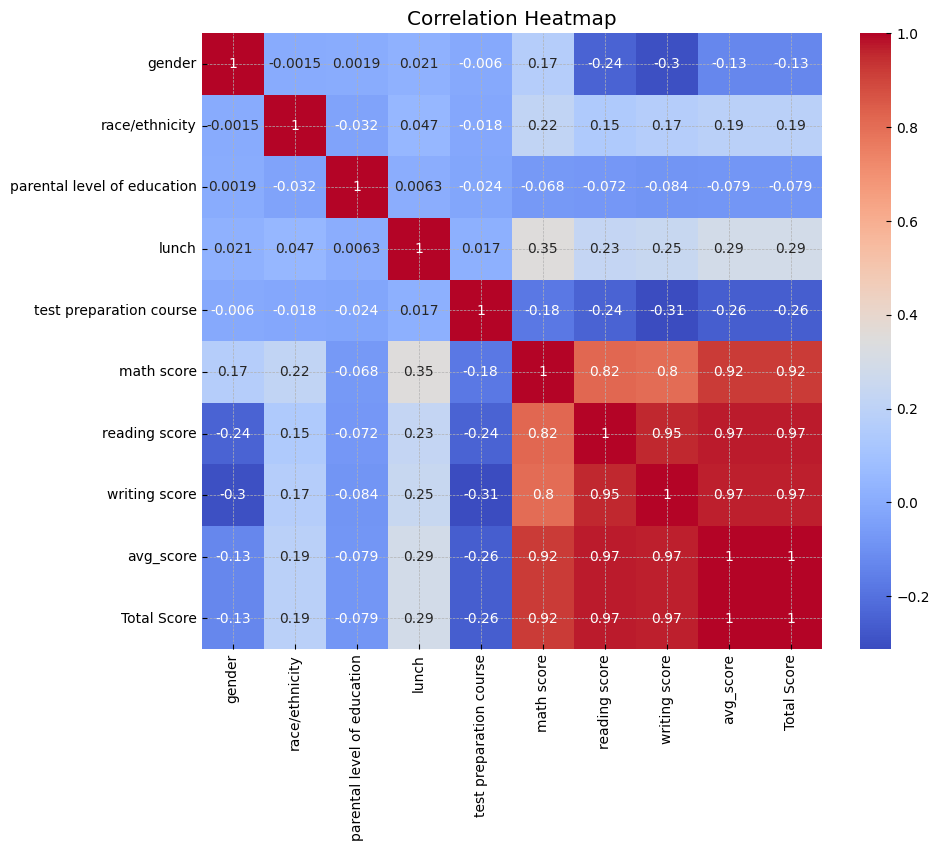

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_le.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [130]:
df.describe(include="object").T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


## Encoding directly

In [131]:
df_cp = df.copy()

In [132]:
# Define the mappings directly
gender_mapping = {'male': 0, 'female': 1}
prep_mapping = {'none': 0, 'completed': 1}
lunch_mapping = {'free/reduced': 0, 'standard': 1}

In [133]:
# Apply the mappings using map
df_cp['gender'] = df_cp['gender'].map(gender_mapping)
df_cp['test preparation course'] = df_cp['test preparation course'].map(prep_mapping)
df_cp['lunch'] = df_cp['lunch'].map(lunch_mapping)

df_cp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,1,group B,bachelor's degree,1,0,72,72,74,72.666667,218
1,1,group C,some college,1,1,69,90,88,82.333333,247
2,1,group B,master's degree,1,0,90,95,93,92.666667,278
3,0,group A,associate's degree,0,0,47,57,44,49.333333,148
4,0,group C,some college,1,0,76,78,75,76.333333,229


## OneHotEncoder

In [134]:
# Initialize OneHotEncoder
oh_encoder = OneHotEncoder(sparse_output=False, drop=None)

In [135]:
race_ethnicity_encoded = oh_encoder.fit_transform(df_cp[['race/ethnicity']])
race_ethnicity_encoded_df = pd.DataFrame(race_ethnicity_encoded, columns=oh_encoder.get_feature_names_out(['race/ethnicity']))
race_ethnicity_encoded_df.head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [136]:
education_encoded = oh_encoder.fit_transform(df_cp[['parental level of education']])
education_encoded_df = pd.DataFrame(education_encoded, columns=oh_encoder.get_feature_names_out(['parental level of education']))
education_encoded_df.head()

,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
# concat

df_cp = pd.concat([df_cp, race_ethnicity_encoded_df, education_encoded_df], axis=1)
df_cp.drop(['race/ethnicity', 'parental level of education'], axis=1, inplace=True)
df_cp.head()

,gender,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,72,72,74,72.666667,218,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,69,90,88,82.333333,247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,0,90,95,93,92.666667,278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,47,57,44,49.333333,148,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,76,78,75,76.333333,229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Scaling

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_cp)
X_test_scaled = scaler.transform(df_cp)

## Train Test Split

In [238]:
X = df_cp.drop(columns= ['avg_score', 'Total Score'], axis=1)
y = df_cp['avg_score']

In [202]:
X_train_sd =pd.DataFrame(X_train_scaled, columns=df_cp.columns)
X_train_sd

,gender,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0.96,0.74,-0.75,0.39,0.19,0.39,0.34,0.34,-0.31,2.06,-0.68,-0.60,-0.40,-0.53,2.73,-0.49,-0.25,-0.54,-0.47
1,0.96,0.74,1.34,0.19,1.43,1.31,1.02,1.02,-0.31,-0.48,1.46,-0.60,-0.40,-0.53,-0.37,-0.49,-0.25,1.85,-0.47
2,0.96,0.74,-0.75,1.58,1.77,1.64,1.75,1.75,-0.31,2.06,-0.68,-0.60,-0.40,-0.53,-0.37,-0.49,3.99,-0.54,-0.47
3,-1.04,-1.35,-0.75,-1.26,-0.83,-1.58,-1.29,-1.29,3.20,-0.48,-0.68,-0.60,-0.40,1.87,-0.37,-0.49,-0.25,-0.54,-0.47
4,-1.04,0.74,-0.75,0.65,0.61,0.46,0.60,0.60,-0.31,-0.48,1.46,-0.60,-0.40,-0.53,-0.37,-0.49,-0.25,1.85,-0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.96,0.74,1.34,1.45,2.04,1.77,1.84,1.84,-0.31,-0.48,-0.68,-0.60,2.48,-0.53,-0.37,-0.49,3.99,-0.54,-0.47
996,-1.04,-1.35,-0.75,-0.27,-0.97,-0.86,-0.73,-0.73,-0.31,-0.48,1.46,-0.60,-0.40,-0.53,-0.37,2.03,-0.25,-0.54,-0.47
997,0.96,-1.35,1.34,-0.47,0.13,-0.20,-0.19,-0.19,-0.31,-0.48,1.46,-0.60,-0.40,-0.53,-0.37,2.03,-0.25,-0.54,-0.47
998,0.96,0.74,1.34,0.13,0.61,0.59,0.46,0.46,-0.31,-0.48,-0.68,1.68,-0.40,-0.53,-0.37,-0.49,-0.25,1.85,-0.47


In [193]:
pd.DataFrame(y)

,Total Score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 17)
(300, 17)
(700,)
(300,)


In [241]:
# lazzy regerssior

from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 74%|███████▍  | 31/42 [00:05<00:01,  7.58it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:06<00:00,  6.41it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 17
[LightGBM] [Info] Start training from score 68.373810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

## **Linear Regression model**

In [242]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [243]:
train_score_LR = LR_model.score(X_train,y_train)
test_score_LR = LR_model.score(X_test,y_test)
train_score_LR , test_score_LR

(1.0, 1.0)

In [250]:
LR_model.coef_

array([-3.93628893e-16, -1.88737914e-15, -1.68749611e-15,  3.33333333e-01,
        3.33333333e-01,  3.33333333e-01,  2.54244006e-16,  3.40382557e-16,
       -1.58519536e-16,  2.47923400e-17, -4.57050999e-16, -2.64904004e-16,
        7.14535444e-16,  3.70875826e-16, -5.10645022e-16,  9.17735954e-17,
       -4.03500646e-16])

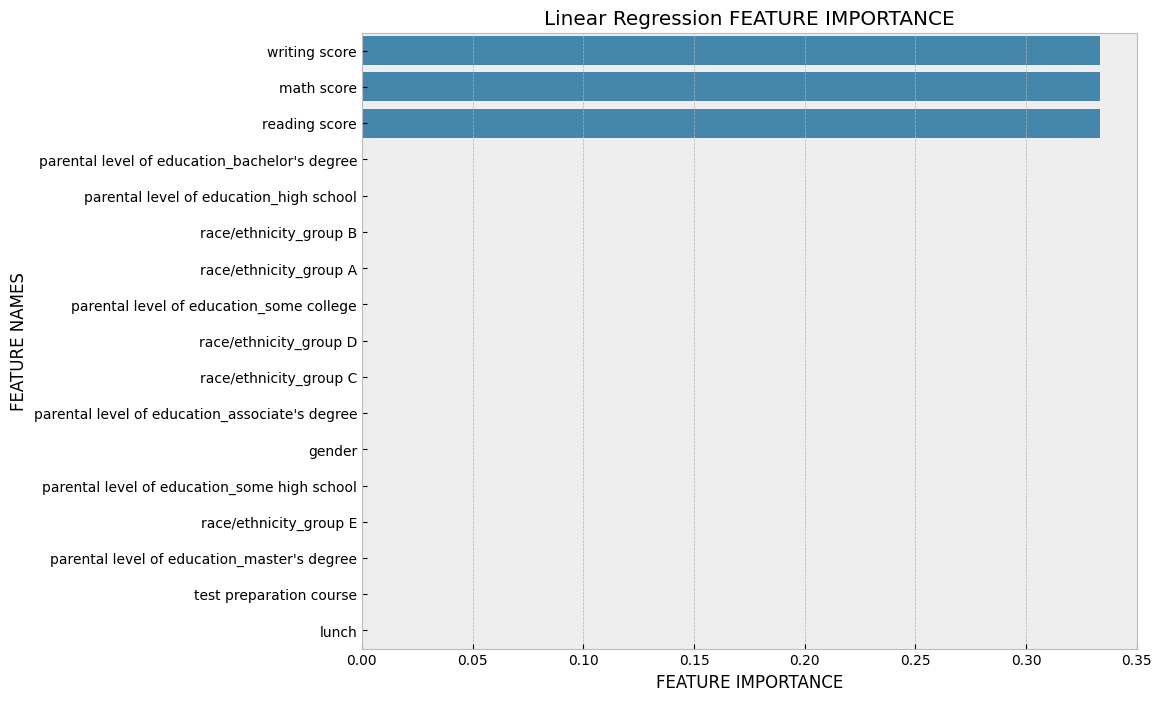

In [246]:
# Calculate feature importance using coefficients
importance = LR_model.coef_

# Get feature names
columns =X_train.columns

# Plot feature importance
feature_importance(importance, columns, "Linear Regression")

In [207]:
df_le

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,0,1,1,1,1,72,72,74,72.67,218
1,0,2,4,1,0,69,90,88,82.33,247
2,0,1,3,1,1,90,95,93,92.67,278
3,1,0,0,0,1,47,57,44,49.33,148
4,1,2,4,1,1,76,78,75,76.33,229
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.00,282
996,1,2,2,0,1,62,55,55,57.33,172
997,0,2,2,0,0,59,71,65,65.00,195
998,0,3,4,1,0,68,78,77,74.33,223


## Label encoder analysis

In [209]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_le_df = scaler.fit_transform(df_le)

In [211]:
scaled_le_df = pd.DataFrame(scaled_le_df, columns=df_le.columns)
scaled_le_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,-0.96,-1.02,-0.81,0.74,0.75,0.39,0.19,0.39,0.34,0.34
1,-0.96,-0.15,0.83,0.74,-1.34,0.19,1.43,1.31,1.02,1.02
2,-0.96,-1.02,0.28,0.74,0.75,1.58,1.77,1.64,1.75,1.75
3,1.04,-1.88,-1.36,-1.35,0.75,-1.26,-0.83,-1.58,-1.29,-1.29
4,1.04,-0.15,0.83,0.74,0.75,0.65,0.61,0.46,0.60,0.60
...,...,...,...,...,...,...,...,...,...,...
995,-0.96,1.58,0.28,0.74,-1.34,1.45,2.04,1.77,1.84,1.84
996,1.04,-0.15,-0.27,-1.35,0.75,-0.27,-0.97,-0.86,-0.73,-0.73
997,-0.96,-0.15,-0.27,-1.35,-1.34,-0.47,0.13,-0.20,-0.19,-0.19
998,-0.96,0.71,0.83,0.74,-1.34,0.13,0.61,0.59,0.46,0.46


In [222]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_score', 'Total Score'],
      dtype='object')

# Train Test Split

In [224]:
X = scaled_le_df.drop(columns= ['avg_score', 'Total Score'], axis=1)
y = scaled_le_df['avg_score']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 26%|██▌       | 11/42 [00:01<00:03,  9.66it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 67%|██████▋   | 28/42 [00:02<00:01, 12.33it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:03<00:00, 12.22it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] Start training from score 0.042325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [234]:
from sklearn.ensemble import ExtraTreesRegressor

ET_model = ExtraTreesRegressor()
ET_model.fit(X_train, y_train)
y_pred = ET_model.predict(X_test)

In [235]:
train_score_RF = ET_model.score(X_train,y_train)
test_score_RF = ET_model.score(X_test,y_test)
train_score_RF , test_score_RF

(1.0, 0.9969413494352144)

In [229]:
def feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [231]:
columns=X_train.columns

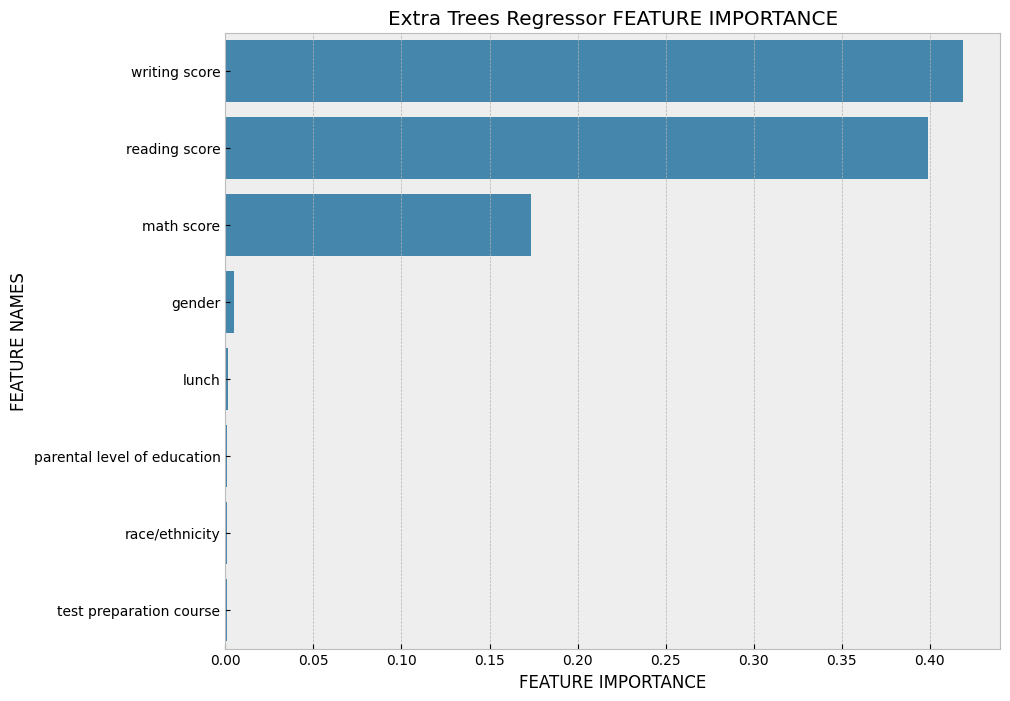

In [237]:
feature_importance(ET_model.feature_importances_,columns[:],"Extra Trees Regressor")